# Review the generated images for quality

This function will generate a series of images comparing the isolate grana regions of interest with their contours, so you can see how well the agorithms did their job. This way you can get visual feedback of problems in the data. 

The images will be in the 'output\processed_images\{x}\roi_vs_contours' where x is the name of the thresholding method

In [1]:
from gapfinder.feedback import create_roi_vs_contours_images

# get the contents of the poi folder, but only the folder names
poi_folder = f"./output/processed_images"
roi_folder = f"./images/roi_images"
metadata_csv = f"{roi_folder}/roi_metadata.csv"
clear_existing = True

create_roi_vs_contours_images( metadata_csv, roi_folder, poi_folder, clear_existing)

# Take a look at a random example:

If you run the code below, it will find and display an example:

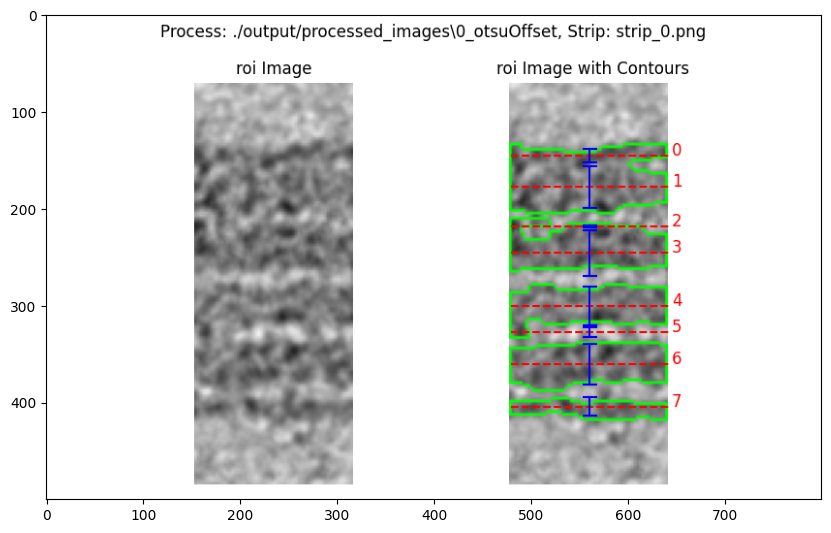

In [15]:
# get a list of all the png images in the folder: output\processed_images\*\roi_vs_contours 
# and then select the first one to display
import glob
import PIL.Image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os
import PIL

images = glob.glob(f"{poi_folder}/**/roi_vs_contours/*.png")
image_filename = images[0]
test_image = PIL.Image.open(images[0])

plt.figure(figsize=(10,10))
imgplot = plt.imshow(test_image)
plt.show()

The blue lines show the membrane width. 
The red lines show were it decided the center of the memrane was.
The green is the contour of the isolated membrane, the output of the make contours functions that thresholds the image. 
The number is a label for which membrane number, so you can identify it in the data files. 

In [21]:
import pandas as pd
df = pd.read_csv("output/membrane.csv") 
first_image_name = df["image_name"].unique()[0]

# get just the data for the first image
image_data = df[df['image_name'] == first_image_name]

# display the data
image_data


,strip,image_name,px_per_nm,nm_per_px,scale,scale_pixels,grana_height,num_membrane,membrane_width,membrane_width_heights,outliers,peaks,type,index,process,membrane_type,membrane_width_nm
0,0,output\processed_images\0_otsuOffset\membrane\...,1.315,0.760456,200,263,102.571429,8,5.125000,7650.0,False,27,membrane,0,0_otsuOffset,outer,3.897338
1,0,output\processed_images\0_otsuOffset\membrane\...,1.315,0.760456,200,263,102.571429,8,15.647059,7650.0,False,39,membrane,1,0_otsuOffset,inner,11.898904
2,0,output\processed_images\0_otsuOffset\membrane\...,1.315,0.760456,200,263,102.571429,8,0.884615,10455.0,False,54,membrane,2,0_otsuOffset,inner,0.672711
3,0,output\processed_images\0_otsuOffset\membrane\...,1.315,0.760456,200,263,102.571429,8,17.454248,7650.0,False,64,membrane,3,0_otsuOffset,inner,13.273193
4,0,output\processed_images\0_otsuOffset\membrane\...,1.315,0.760456,200,263,102.571429,8,14.483806,7650.0,False,84,membrane,4,0_otsuOffset,inner,11.014301
5,0,output\processed_images\0_otsuOffset\membrane\...,1.315,0.760456,200,263,102.571429,8,3.562500,1912.5,False,94,membrane,5,0_otsuOffset,inner,2.709125
6,0,output\processed_images\0_otsuOffset\membrane\...,1.315,0.760456,200,263,102.571429,8,15.683190,7650.0,False,106,membrane,6,0_otsuOffset,inner,11.926380
7,0,output\processed_images\0_otsuOffset\membrane\...,1.315,0.760456,200,263,102.571429,8,6.914286,7650.0,False,122,membrane,7,0_otsuOffset,outer,5.258012


# Do your worst
I dunno, do whatever you were gonna do!